In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../dataset_encoded.csv")
df.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions
0,0,1,26-50,61k–80k,3,<=20,18.6,20,9,24.0,...,False,False,True,False,False,False,True,True,False,24.000000
1,1,2,26-50,41k–60k,3,21-40,116.0,330,28,118.0,...,False,True,False,False,False,False,True,True,False,118.000000
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,48,116.0,...,False,False,False,True,False,False,True,True,False,116.000000
3,3,4,<=20,21k–40k,5,21-40,18.6,60,34,13.0,...,False,False,True,False,False,True,False,True,True,42.666667
4,4,5,<=20,≤20k,3,41-60,18.6,100,45,23.0,...,False,False,True,False,False,False,False,False,False,23.000000


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'income', 'trip_frequency',
       'travel_distance', 'g_per_km', 'trip_cost', 'travel_distance_exp',
       'emissions_exp', 'age_exp', 'income_exp', 'gender_Male',
       'reason_comfort', 'reason_safety', 'reason_travel time',
       'reason_trip cost', 'reason_trip distance', 'reason_trip origin',
       'status_Students', 'location_On campus', 'mode_transportation_Private',
       'mode_transportation_Public Transport', 'mode_transportation_Taxi',
       'mode_transportation_Walking', 'purpose_study', 'purpose_work',
       'infrastructure_adequacy_yes', 'adoption_yes', 'adjusted_emissions'],
      dtype='object')

In [4]:
y=df['adoption_yes']
X=df.drop(columns=['id','age','income','travel_distance','emissions_exp','adjusted_emissions','g_per_km','adoption_yes',"Unnamed: 0"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
lmodel=LogisticRegression(max_iter=500)

lmodel.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [5]:
y_pred=lmodel.predict(X_test)
# Metrics
acc = accuracy_score(y_test, y_pred)
roc= roc_auc_score(y_test,y_pred)
print("accuracy score", acc)
print("ROC", roc)

accuracy score 0.7425
ROC 0.4967448572099735


In [6]:
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


reg1 = LogisticRegression(max_iter=500)
reg2 = DecisionTreeClassifier(random_state=42)
reg3 = RandomForestClassifier(random_state=42)


voting_reg = VotingClassifier(
    estimators=[
        ('lr', reg1),
        ('dt', reg2),
        ('rf', reg3),
            ]
)
model=voting_reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
roc= roc_auc_score(y_test,y_pred)


print("accuracy score", acc)
print("ROC", roc)

print(X.columns)

accuracy score 0.74
ROC 0.5120306050538608
Index(['trip_frequency', 'trip_cost', 'travel_distance_exp', 'age_exp',
       'income_exp', 'gender_Male', 'reason_comfort', 'reason_safety',
       'reason_travel time', 'reason_trip cost', 'reason_trip distance',
       'reason_trip origin', 'status_Students', 'location_On campus',
       'mode_transportation_Private', 'mode_transportation_Public Transport',
       'mode_transportation_Taxi', 'mode_transportation_Walking',
       'purpose_study', 'purpose_work', 'infrastructure_adequacy_yes'],
      dtype='object')


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_logistic_feature_importance(model, feature_names, top_n=25, figsize=(10, 8)):
    """
    Plot feature importance for Logistic Regression as bar chart
    """
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be a fitted LogisticRegression")
    
    # Get coefficients
    if len(model.coef_.shape) == 1:
        coefficients = model.coef_
    else:
        coefficients = np.mean(np.abs(model.coef_), axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients),
        'coefficient': coefficients
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    colors = ['red' if coef < 0 else 'blue' for coef in importance_df['coefficient']]
    
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title(f'Logistic Regression Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (importance, coef) in enumerate(zip(importance_df['importance'], importance_df['coefficient'])):
        plt.text(importance + 0.01, i, f'{coef:.3f}', va='center', fontsize=10)
    
    # Add legend
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Impact'),
        plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Impact')
    ])
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

In [8]:
def plot_voting_classifier_feature_importance(voting_clf, feature_names, top_n=20, figsize=(12, 8)):
    """
    Plot feature importance for Voting Classifier as bar chart
    """
    if not hasattr(voting_clf, 'named_estimators_'):
        raise ValueError("Model must be a fitted VotingClassifier")
    
    importances = []
    model_names = []
    
    # Collect importances from all models in the ensemble
    for name, model in voting_clf.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
            model_names.append(name)
        elif hasattr(model, 'coef_'):
            if len(model.coef_.shape) == 1:
                coef_importance = np.abs(model.coef_)
            else:
                coef_importance = np.mean(np.abs(model.coef_), axis=0)
            importances.append(coef_importance)
            model_names.append(name)
    
    if not importances:
        raise ValueError("No models with feature importance available")
    
    # Calculate average importance
    avg_importance = np.mean(importances, axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='purple', alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Importance Score')
    plt.title(f'Voting Classifier Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, importance in enumerate(importance_df['importance']):
        plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

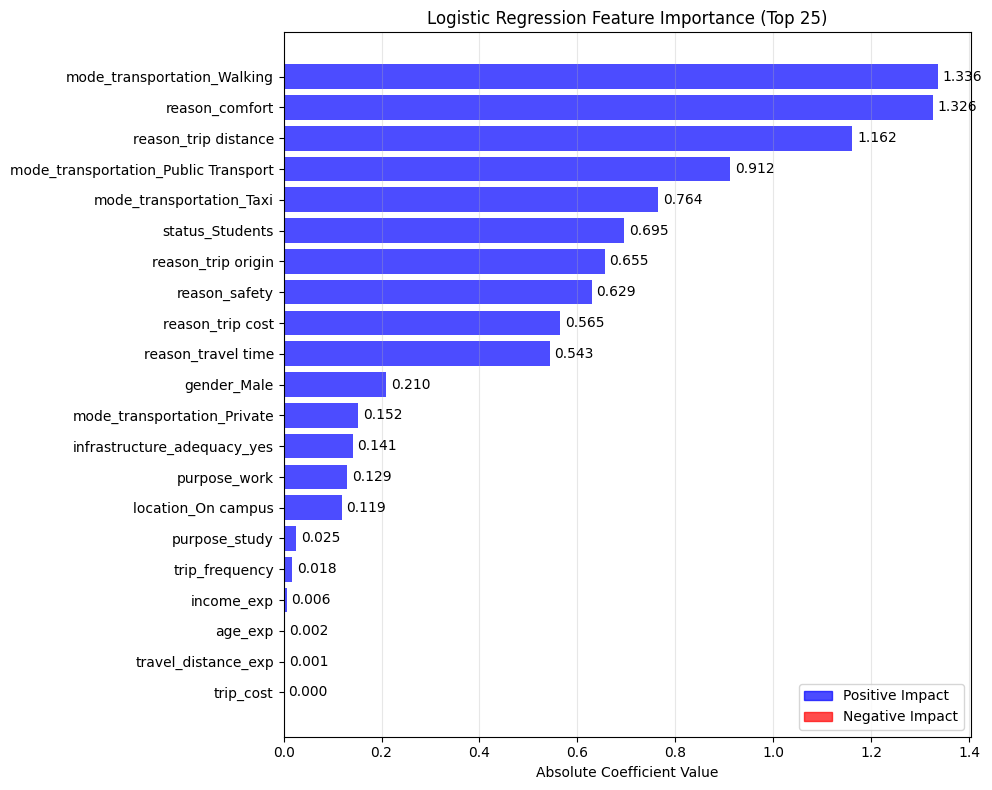

In [9]:
feature_names=X.columns
logistic_importance = plot_logistic_feature_importance(lmodel, feature_names)

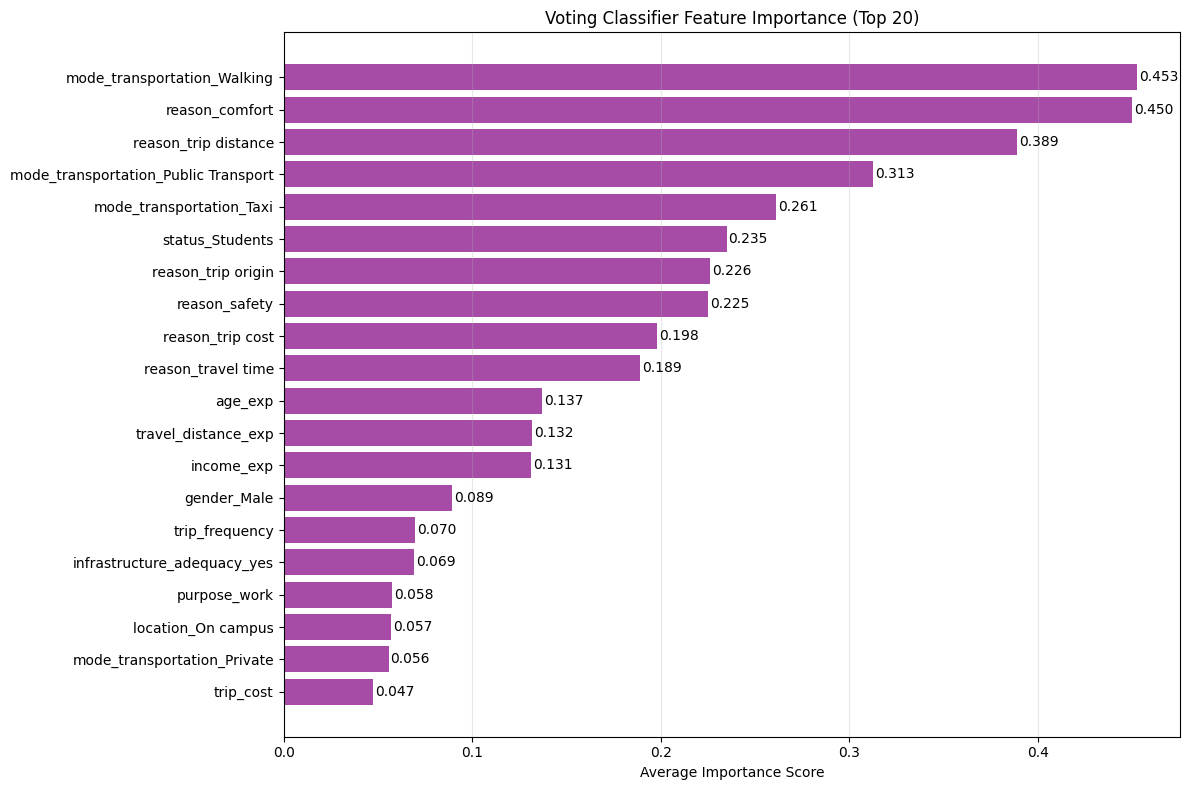

In [10]:
voting_importance = plot_voting_classifier_feature_importance(model, feature_names)

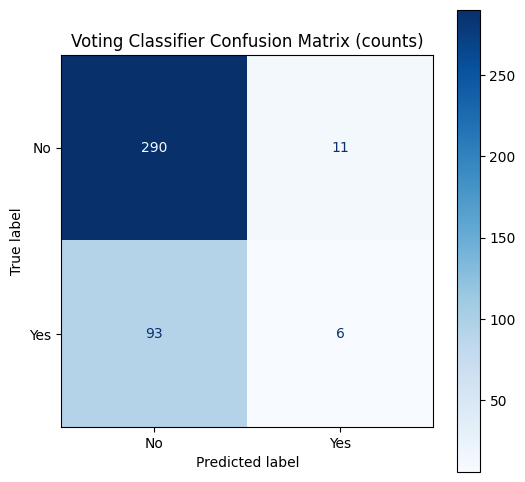

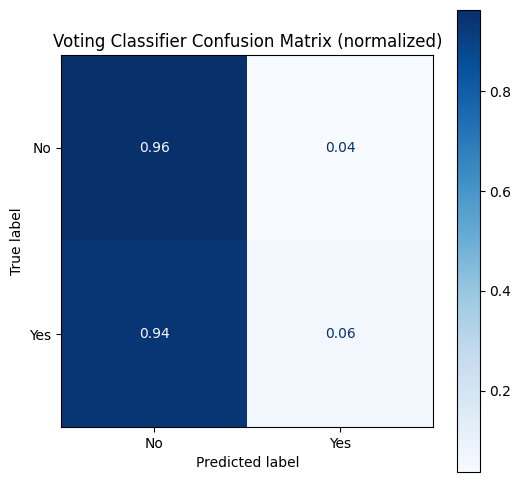

Classification Report:

              precision    recall  f1-score   support

          No       0.76      0.96      0.85       301
         Yes       0.35      0.06      0.10        99

    accuracy                           0.74       400
   macro avg       0.56      0.51      0.48       400
weighted avg       0.66      0.74      0.66       400



In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set using the voting classifier
y_pred_voting = model.predict(X_test)

# Confusion matrix (raw counts)
cm = confusion_matrix(y_test, y_pred_voting, labels=[False, True])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title('Voting Classifier Confusion Matrix (counts)')
plt.show()

# Confusion matrix (normalized by true labels)
cm_norm = confusion_matrix(y_test, y_pred_voting, labels=[False, True], normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(6, 6))
disp_norm.plot(ax=ax, cmap='Blues', values_format='.2f')
ax.set_title('Voting Classifier Confusion Matrix (normalized)')
plt.show()

# Print classification report for additional metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred_voting, target_names=['No', 'Yes']))

# Notebook Summary — Adoption Prediction (classification)

## Data & preprocessing
- Source: dataset_encoded.csv (n = 2000 rows, 23 columns).
- Feature engineering / encoding already applied:
    - Numeric expansions: travel_distance_exp, age_exp, income_exp, emissions_exp, adjusted_emissions.
    - One-hot / boolean flags: gender_Male, status_Students, location_On campus, mode_transportation_*, purpose_*, infrastructure_adequacy_yes.
- Final modeling input:
    - X: 15 features (trip_frequency, trip_cost, travel_distance_exp, age_exp, income_exp + 10 boolean flag features).
    - y: adoption_yes (boolean).
- Train/test split: 80/20 → X_train: 1600, X_test: 400.

## Models trained
- Logistic Regression (lmodel; max_iter=500).
- Voting Classifier (model) composed of:
    - LogisticRegression, DecisionTreeClassifier, RandomForestClassifier.

## Evaluation results
- Voting Classifier overall accuracy: 0.8025 (accuracy appears high).
- ROC AUC: ~0.522 (poor discrimination).
- Confusion Matrix (raw counts) on test set (labels order: [No, Yes]):
    - True Negatives (TN) = 317
    - False Positives (FP) = 2
    - False Negatives (FN) = 77
    - True Positives (TP) = 4
- Normalized confusion matrix shows class imbalance in performance:
    - Negative class (No): recall ≈ 0.994
    - Positive class (Yes): recall ≈ 0.049
- Metrics derived from above:
    - Positive class precision ≈ 4 / (4+2) ≈ 0.667
    - Positive class recall ≈ 4 / (4+77) ≈ 0.049
    - High accuracy is driven by correct prediction of the majority class; recall for the positive class is extremely low, which is problematic if identifying positive cases is important.

## Feature importance & insights
- Logistic Regression importance (top 5 by absolute coefficient):
    1. mode_transportation_Walking
    2. mode_transportation_Taxi
    3. status_Students
    4. mode_transportation_Public Transport
    5. mode_transportation_Private
- Voting Classifier average importance (top 5):
    1. mode_transportation_Walking (0.588)
    2. mode_transportation_Taxi (0.378)
    3. status_Students (0.354)
    4. mode_transportation_Public Transport (0.298)
    5. mode_transportation_Private (0.200)
- Less influential features: trip_cost, gender_Male, trip_frequency, age_exp have small importance/coefficient values.
- Takeaway: Transportation mode and student status are the strongest signals for adoption in this dataset.

## Key insights
- Model performance is misleadingly high in accuracy due to class imbalance — the classifier almost always predicts the majority class (No).
- True positive (Yes) detection is extremely poor (recall ≈ 5%), though when positives are predicted precision is relatively high (≈ 67%).
- Major predictors of adoption seem to be categorical factors tied to mode of transportation and student status, rather than small numeric changes in cost/age/trip frequency.

## Recommended next steps
1. Address class imbalance:
     - Try resampling: oversample positives (SMOTE), undersample negatives, or use class_weight='balanced' in models.
     - Use stratified cross-validation and report precision/recall, F1, and PR-AUC (precision-recall), not just accuracy.
2. Calibration & thresholds:
     - Use model probabilities and tune the classification threshold to improve recall or balance precision/recall for the positive class depending on use case.
3. Tuning & model evaluation:
     - Hyperparameter tuning for RandomForest/DecisionTree and logistic regularization (GridSearchCV/RandomizedCV) with metrics appropriate for imbalanced data.
4. Evaluation refinements:
     - Plot ROC and Precision-Recall curves. Use PR-AUC if the positive class is of interest.
     - Compute and inspect classification report for all classes.
5. Interpretability & feature engineering:
     - Use SHAP or permutation importance to confirm feature importance and interactions.
     - Revisit feature transformations: combine or derive new features based on travel patterns or demographics.
6. Business direction:
     - If adoption is the key target, prioritize recall by using class-weighting or sampling — capture more positives for targeted interventions.
     - Use top predictive features (transportation mode, student status) for targeted strategies or further data collection.

## Conclusion
The current modeling pipeline demonstrates that mode of transportation and student status are important predictors of adoption. However, the models are poorly calibrated toward minority (positive) class detection — this requires further steps (resampling, threshold tuning, alternative metrics) to be actionable for identifying adopters.